In [2]:
from tensorflow.keras.applications import VGG16
import tensorflow.keras,os
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras import optimizers
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

In [3]:
input_shape=(224, 224, 3)

In [4]:
# create model
input_img = Input(shape=input_shape, name='main_input')

In [5]:
# model1 = ResNet101(include_top=False, weights=None, input_shape=input_shape)(input_img)
model = VGG16(include_top=False, weights="imagenet", input_shape=input_shape)(input_img)

In [6]:
out = Flatten()(model)
out = Dense(1, activation='sigmoid')(out)

In [7]:
model_vgg16 = Model(inputs=input_img, outputs=out)
model_vgg16.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_vgg16.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 25089     
Total params: 14,739,777
Trainable params: 14,739,777
Non-trainable params: 0
_________________________________________________________________


In [8]:
###########################################################
# 데이터 전처리
###########################################################


train_datagen = ImageDataGenerator(rescale=1./255)  # 모든 이미지를 1/255로 스케일을 조정합니다
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "./dataset/train2"
validation_dir = './dataset/vali2'

batch_size = 8
# batch_size = 64


train_generator = train_datagen.flow_from_directory( \
        train_dir,                  # 타깃 디렉터리
        target_size=(224, 224),     # 모든 이미지를 224 × 224 크기
        batch_size=batch_size,
        class_mode='binary')        #

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')

Found 802 images belonging to 2 classes.
Found 286 images belonging to 2 classes.


In [9]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)  #(20, 150, 150, 3)
    print('배치 레이블 크기:', labels_batch.shape) #(20,)
    break

배치 데이터 크기: (8, 224, 224, 3)
배치 레이블 크기: (8,)


In [10]:
steps_per_epochs = 50 # 학습데이터의 총 개수 / 배치 사이즈 (소수점 올림)
epochs = 5

history = model_vgg16.fit(
      train_generator ,
      steps_per_epoch=steps_per_epochs  ,
      epochs=epochs ,
      validation_data=validation_generator,
      validation_steps=10)

Epoch 1/5
50/50 [==============================] - 35s 373ms/step - loss: 0.8950 - accuracy: 0.4775 - val_loss: 0.6941 - val_accuracy: 0.4250
Epoch 2/5
50/50 [==============================] - 19s 370ms/step - loss: 0.7097 - accuracy: 0.5575 - val_loss: 0.7124 - val_accuracy: 0.5000
Epoch 3/5
50/50 [==============================] - 19s 378ms/step - loss: 0.6983 - accuracy: 0.4725 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 4/5
50/50 [==============================] - 19s 375ms/step - loss: 0.6952 - accuracy: 0.4875 - val_loss: 0.6939 - val_accuracy: 0.4000
Epoch 5/5
50/50 [==============================] - 22s 444ms/step - loss: 0.6970 - accuracy: 0.5355 - val_loss: 0.6931 - val_accuracy: 0.5500


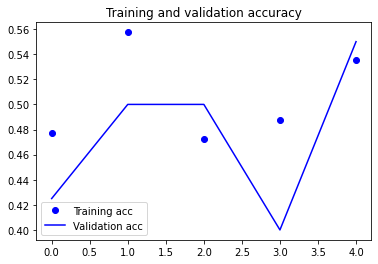

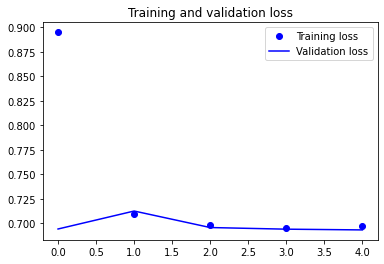

In [11]:
###########################################################
# 학습 결과 정확도 및 비용 그래프
###########################################################
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model_vgg16.save("./tn_model/vgg16_last.h5")